# 导入模块

In [1]:
import sys

sys.executable

'/root/miniconda3/bin/python'

In [2]:
import os
from os import path

In [3]:
import gc

In [4]:
os.listdir('../Project Data/')

['4月',
 '20190529',
 '20190529-4G电围.xls',
 '.DS_Store',
 '分析数据',
 '3月',
 'data_eda.ipynb',
 'same',
 '20190529-001.csv',
 '20190424-001.xlsx',
 '20190524-001.csv',
 '20190529-4G_resave.csv',
 'test.py',
 '20190422-灵瞳感知器.xls',
 '最新数据',
 '050823数据表']

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set_style()

In [9]:
help(sns.set_style)

Help on function set_style in module seaborn.rcmod:

set_style(style=None, rc=None)
    Set the aesthetic style of the plots.
    
    This affects things like the color of the axes, whether a grid is
    enabled by default, and other aesthetic elements.
    
    Parameters
    ----------
    style : dict, None, or one of {darkgrid, whitegrid, dark, white, ticks}
        A dictionary of parameters or the name of a preconfigured set.
    rc : dict, optional
        Parameter mappings to override the values in the preset seaborn
        style dictionaries. This only updates parameters that are
        considered part of the style definition.
    
    Examples
    --------
    >>> set_style("whitegrid")
    
    >>> set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})
    
    See Also
    --------
    axes_style : return a dict of parameters or use in a ``with`` statement
                 to temporarily set the style.
    set_context : set parameters to scale plot elements


# 用户轨迹探索

In [6]:
os.chdir('../Project Data/')

In [7]:
import pandas as pd

In [8]:
data = pd.read_csv('20190524-001.csv', nrows=1000, encoding='gbk')

In [9]:
data.head()

,imsi_,imei_,update_time_,lac_,cellid_,status_,ap_type_,device_id_,eventid_,area_,msisdn_
0,460110413044304,\t,2019-05-08 20:09:29\t,0,0,拒绝\t,FDD-LTE\t,DX-SZSC001\t,Normal Lau\t,\t,\t
1,460110413042577,\t,2019-05-08 20:09:41\t,0,0,拒绝\t,FDD-LTE\t,DX-SZSC001\t,Normal Lau\t,\t,\t
2,460110425023300,\t,2019-05-08 20:10:14\t,0,0,拒绝\t,FDD-LTE\t,DX-SZSC001\t,Normal Lau\t,\t,\t
3,460110714141865,\t,2019-05-08 20:10:40\t,0,0,拒绝\t,FDD-LTE\t,DX-SZSC001\t,Normal Lau\t,\t,\t
4,460016692088409,\t,2019-05-08 20:08:55\t,0,0,拒绝\t,FDD-LTE\t,LT-SZSC001\t,Normal Lau\t,\t,\t


In [10]:
drop_col = ['imei_', 'area_', 'msisdn_']
data1 = data.drop(drop_col,axis=1)

In [11]:
def get_data(file_name):
    file_extension = path.splitext(file_name)[1]
    if file_extension == '.csv':
        data = pd.read_csv(file_name, encoding='gbk')
    elif file_extension == '.xlsx':
        data = pd.read_excel(file_name, encoding='gbk')
    drop_col = ['imei_', 'area_', 'msisdn_']
    data.drop(drop_col, axis=1, inplace=True)
    col = data.columns
    for each in col:
        if data[each].dtype == object:
            data[each] = data[each].str.replace('\t', '')
    print('data processed successfully')
    return data

In [12]:
os.listdir()

['4月',
 '20190529',
 '20190529-4G电围.xls',
 '.DS_Store',
 '分析数据',
 '3月',
 'data_eda.ipynb',
 'same',
 '20190529-001.csv',
 '20190424-001.xlsx',
 '20190524-001.csv',
 '20190529-4G_resave.csv',
 'test.py',
 '20190422-灵瞳感知器.xls',
 '最新数据',
 '050823数据表']

In [13]:
data1 = get_data('20190524-001.csv')
data2 = get_data('20190529-001.csv')

data processed successfully
data processed successfully


In [14]:
data1.head()

,imsi_,update_time_,lac_,cellid_,status_,ap_type_,device_id_,eventid_
0,460110413044304,2019-05-08 20:09:29,0,0,拒绝,FDD-LTE,DX-SZSC001,Normal Lau
1,460110413042577,2019-05-08 20:09:41,0,0,拒绝,FDD-LTE,DX-SZSC001,Normal Lau
2,460110425023300,2019-05-08 20:10:14,0,0,拒绝,FDD-LTE,DX-SZSC001,Normal Lau
3,460110714141865,2019-05-08 20:10:40,0,0,拒绝,FDD-LTE,DX-SZSC001,Normal Lau
4,460016692088409,2019-05-08 20:08:55,0,0,拒绝,FDD-LTE,LT-SZSC001,Normal Lau


In [15]:
def convert_to_time(data):
    for each in data:
#         print(each.columns)
        each.index = pd.to_datetime(each['update_time_'])
#         print(each.colums)
#         each.drop(['update_time_'], axis=1, inplace=True)
    print('successfully')
    return data

In [16]:
data1_, data2_ = convert_to_time([data1, data2])

successfully


In [17]:
data1.head()

,imsi_,update_time_,lac_,cellid_,status_,ap_type_,device_id_,eventid_
update_time_,,,,,,,,
2019-05-08 20:09:29,460110413044304,2019-05-08 20:09:29,0,0,拒绝,FDD-LTE,DX-SZSC001,Normal Lau
2019-05-08 20:09:41,460110413042577,2019-05-08 20:09:41,0,0,拒绝,FDD-LTE,DX-SZSC001,Normal Lau
2019-05-08 20:10:14,460110425023300,2019-05-08 20:10:14,0,0,拒绝,FDD-LTE,DX-SZSC001,Normal Lau
2019-05-08 20:10:40,460110714141865,2019-05-08 20:10:40,0,0,拒绝,FDD-LTE,DX-SZSC001,Normal Lau
2019-05-08 20:08:55,460016692088409,2019-05-08 20:08:55,0,0,拒绝,FDD-LTE,LT-SZSC001,Normal Lau


In [18]:
data1.shape

(338898, 8)

In [19]:
data2.shape

(430480, 8)

可以发现，数据1检测的时间有16天。数据2检测的时间有7天

In [20]:
data1_.index.day[-1] - data1_.index.day[0]

16

In [21]:
data2_.index.day[-1] - data2_.index.day[0]

21

In [22]:
# 可以按时间这样切片。但必须是Series，不能是DF
data1_.imsi_['20190508':'20190515']

update_time_
2019-05-08 20:09:29    460110413044304
2019-05-08 20:09:41    460110413042577
2019-05-08 20:10:14    460110425023300
2019-05-08 20:10:40    460110714141865
2019-05-08 20:08:55    460016692088409
                            ...       
2019-05-15 23:58:43    460019454206454
2019-05-15 23:59:11    460015232357562
2019-05-15 23:59:21    460008760270567
2019-05-15 23:59:24    460110714141865
2019-05-15 23:59:46    460029420804175
Name: imsi_, Length: 147072, dtype: int64

In [23]:
one_week = data1_.loc['20190508':'20190515', :]

In [24]:
one_week.head()

,imsi_,update_time_,lac_,cellid_,status_,ap_type_,device_id_,eventid_
update_time_,,,,,,,,
2019-05-08 20:09:29,460110413044304,2019-05-08 20:09:29,0,0,拒绝,FDD-LTE,DX-SZSC001,Normal Lau
2019-05-08 20:09:41,460110413042577,2019-05-08 20:09:41,0,0,拒绝,FDD-LTE,DX-SZSC001,Normal Lau
2019-05-08 20:10:14,460110425023300,2019-05-08 20:10:14,0,0,拒绝,FDD-LTE,DX-SZSC001,Normal Lau
2019-05-08 20:10:40,460110714141865,2019-05-08 20:10:40,0,0,拒绝,FDD-LTE,DX-SZSC001,Normal Lau
2019-05-08 20:08:55,460016692088409,2019-05-08 20:08:55,0,0,拒绝,FDD-LTE,LT-SZSC001,Normal Lau


In [25]:
one_week.imsi_.nunique()/one_week.shape[0] # 说明大部分id都是重复出现过的

0.31764713881636203

In [26]:
# 说明只有三个机器
one_week.device_id_.unique()

array(['DX-SZSC001', 'LT-SZSC001', 'YD-SZSC001'], dtype=object)

In [27]:
one_week.eventid_.unique()

array(['Normal Lau'], dtype=object)

In [28]:
one_week.imsi_.value_counts() # 有很多一个星期只出现过一次的

460110714141865    1732
460110413044304     581
460012480316441     515
460110700163772     479
460014946660039     457
                   ... 
460002606630392       1
460002606768993       1
460022786534869       1
460075737808351       1
460028146282347       1
Name: imsi_, Length: 46717, dtype: int64

In [29]:
gc.collect()

264

In [30]:
data1.groupby(['imsi_', 'device_id_',])['update_time_'].value_counts()

imsi_            device_id_  update_time_       
204043315383882  DX-SZSC001  2019-05-23 17:20:10    1
204043863737390  DX-SZSC001  2019-05-24 14:51:06    1
204046031010732  DX-SZSC001  2019-05-09 14:19:45    1
204047102616026  LT-SZSC001  2019-05-15 20:13:18    1
206012229081504  YD-SZSC001  2019-05-10 12:11:12    1
                                                   ..
525058231350753  YD-SZSC001  2019-05-10 13:44:48    1
                             2019-05-10 14:01:04    1
                             2019-05-10 14:16:48    1
                             2019-05-10 14:32:55    1
641101902316484  YD-SZSC001  2019-05-17 22:42:52    1
Name: update_time_, Length: 338796, dtype: int64

**可以发现res的columns只有三列。而index是元祖的形式**

In [177]:
res = res.fillna(0)

In [179]:
res

device_id_                           DX-SZSC001  LT-SZSC001  YD-SZSC001
imsi_           update_time_                                           
204043315383882 2019-05-23 17:20:10         1.0         0.0         0.0
204043863737390 2019-05-24 14:51:06         1.0         0.0         0.0
204046031010732 2019-05-09 14:19:45         1.0         0.0         0.0
204047102616026 2019-05-15 20:13:18         0.0         1.0         0.0
206012229081504 2019-05-10 12:11:12         0.0         0.0         1.0
...                                         ...         ...         ...
525058231350753 2019-05-10 13:44:48         0.0         0.0         1.0
                2019-05-10 14:01:04         0.0         0.0         1.0
                2019-05-10 14:16:48         0.0         0.0         1.0
                2019-05-10 14:32:55         0.0         0.0         1.0
641101902316484 2019-05-17 22:42:52         0.0         0.0         1.0

[338796 rows x 3 columns]

In [180]:
help(pd.DataFrame.unstack)

Help on function unstack in module pandas.core.frame:

unstack(self, level=-1, fill_value=None)
    Pivot a level of the (necessarily hierarchical) index labels.
    
    Returns a DataFrame having a new level of column labels whose inner-most level
    consists of the pivoted index labels.
    
    If the index is not a MultiIndex, the output will be a Series
    (the analogue of stack when the columns are not a MultiIndex).
    
    Parameters
    ----------
    level : int, str, or list of these, default -1 (last level)
        Level(s) of index to unstack, can pass level name.
    fill_value : int, str or dict
        Replace NaN with this value if the unstack produces missing values.
    
    Returns
    -------
    Series or DataFrame
    
    See Also
    --------
    DataFrame.pivot : Pivot a table based on column values.
    DataFrame.stack : Pivot a level of the column labels (inverse operation
        from `unstack`).
    
    Examples
    --------
    >>> index = pd.MultiIn

In [45]:
def trace(data):
    data1.groupby(['imsi_', 'update_time_',])['device_id_'].value_counts().unstack(fill_value=0)
    return data

In [33]:
data1.head()

,imsi_,update_time_,lac_,cellid_,status_,ap_type_,device_id_,eventid_
update_time_,,,,,,,,
2019-05-08 20:09:29,460110413044304,2019-05-08 20:09:29,0,0,拒绝,FDD-LTE,DX-SZSC001,Normal Lau
2019-05-08 20:09:41,460110413042577,2019-05-08 20:09:41,0,0,拒绝,FDD-LTE,DX-SZSC001,Normal Lau
2019-05-08 20:10:14,460110425023300,2019-05-08 20:10:14,0,0,拒绝,FDD-LTE,DX-SZSC001,Normal Lau
2019-05-08 20:10:40,460110714141865,2019-05-08 20:10:40,0,0,拒绝,FDD-LTE,DX-SZSC001,Normal Lau
2019-05-08 20:08:55,460016692088409,2019-05-08 20:08:55,0,0,拒绝,FDD-LTE,LT-SZSC001,Normal Lau


## 用户轨迹数据存储

In [37]:
data1.head()

,imsi_,update_time_,lac_,cellid_,status_,ap_type_,device_id_,eventid_
update_time_,,,,,,,,
2019-05-08 20:09:29,460110413044304,2019-05-08 20:09:29,0,0,拒绝,FDD-LTE,DX-SZSC001,Normal Lau
2019-05-08 20:09:41,460110413042577,2019-05-08 20:09:41,0,0,拒绝,FDD-LTE,DX-SZSC001,Normal Lau
2019-05-08 20:10:14,460110425023300,2019-05-08 20:10:14,0,0,拒绝,FDD-LTE,DX-SZSC001,Normal Lau
2019-05-08 20:10:40,460110714141865,2019-05-08 20:10:40,0,0,拒绝,FDD-LTE,DX-SZSC001,Normal Lau
2019-05-08 20:08:55,460016692088409,2019-05-08 20:08:55,0,0,拒绝,FDD-LTE,LT-SZSC001,Normal Lau


In [42]:
data1.index = range(data1.shape[0])

In [47]:
data1.head()

,imsi_,update_time_,lac_,cellid_,status_,ap_type_,device_id_,eventid_
0,460110413044304,2019-05-08 20:09:29,0,0,拒绝,FDD-LTE,DX-SZSC001,Normal Lau
1,460110413042577,2019-05-08 20:09:41,0,0,拒绝,FDD-LTE,DX-SZSC001,Normal Lau
2,460110425023300,2019-05-08 20:10:14,0,0,拒绝,FDD-LTE,DX-SZSC001,Normal Lau
3,460110714141865,2019-05-08 20:10:40,0,0,拒绝,FDD-LTE,DX-SZSC001,Normal Lau
4,460016692088409,2019-05-08 20:08:55,0,0,拒绝,FDD-LTE,LT-SZSC001,Normal Lau


In [49]:
data1.groupby(['imsi_', 'update_time_'])['device_id_'].value_counts().unstack(fill_value=0)

device_id_                           DX-SZSC001  LT-SZSC001  YD-SZSC001
imsi_           update_time_                                           
204043315383882 2019-05-23 17:20:10           1           0           0
204043863737390 2019-05-24 14:51:06           1           0           0
204046031010732 2019-05-09 14:19:45           1           0           0
204047102616026 2019-05-15 20:13:18           0           1           0
206012229081504 2019-05-10 12:11:12           0           0           1
...                                         ...         ...         ...
525058231350753 2019-05-10 13:44:48           0           0           1
                2019-05-10 14:01:04           0           0           1
                2019-05-10 14:16:48           0           0           1
                2019-05-10 14:32:55           0           0           1
641101902316484 2019-05-17 22:42:52           0           0           1

[338796 rows x 3 columns]

In [51]:
res = data1.groupby(['imsi_', 'update_time_'])['device_id_'].value_counts().unstack(fill_value=0)

In [61]:
res.head()

,device_id_,DX-SZSC001,LT-SZSC001,YD-SZSC001
imsi_,update_time_,,,
204043315383882,2019-05-23 17:20:10,1,0,0
204043863737390,2019-05-24 14:51:06,1,0,0
204046031010732,2019-05-09 14:19:45,1,0,0
204047102616026,2019-05-15 20:13:18,0,1,0
206012229081504,2019-05-10 12:11:12,0,0,1


In [62]:
# 开始数据存储
res.to_dict('split')
    
    

{'index': [(204043315383882, '2019-05-23 17:20:10'),
  (204043863737390, '2019-05-24 14:51:06'),
  (204046031010732, '2019-05-09 14:19:45'),
  (204047102616026, '2019-05-15 20:13:18'),
  (206012229081504, '2019-05-10 12:11:12'),
  (208015003798694, '2019-05-24 14:13:11'),
  (208150100612490, '2019-05-19 14:49:44'),
  (208150404397075, '2019-05-16 18:43:21'),
  (220018003872080, '2019-05-09 11:42:28'),
  (220033300577253, '2019-05-09 11:42:41'),
  (222992312514644, '2019-05-08 21:30:45'),
  (222992312514644, '2019-05-09 08:54:47'),
  (222992312514644, '2019-05-09 21:27:52'),
  (222992312514644, '2019-05-10 08:48:07'),
  (222992312514644, '2019-05-10 19:28:31'),
  (222992312514644, '2019-05-11 13:45:16'),
  (222992312514644, '2019-05-11 18:25:41'),
  (222992312514644, '2019-05-13 08:53:11'),
  (222992312514644, '2019-05-13 17:00:19'),
  (222992312514644, '2019-05-13 18:46:10'),
  (222992312514644, '2019-05-13 21:24:40'),
  (222992312514644, '2019-05-14 08:46:25'),
  (222992312514644, '20

# 新入网，新离网探索

In [42]:
data1.head()

,imsi_,update_time_,lac_,cellid_,status_,ap_type_,device_id_,eventid_
update_time_,,,,,,,,
2019-05-08 20:09:29,460110413044304,2019-05-08 20:09:29,0,0,拒绝,FDD-LTE,DX-SZSC001,Normal Lau
2019-05-08 20:09:41,460110413042577,2019-05-08 20:09:41,0,0,拒绝,FDD-LTE,DX-SZSC001,Normal Lau
2019-05-08 20:10:14,460110425023300,2019-05-08 20:10:14,0,0,拒绝,FDD-LTE,DX-SZSC001,Normal Lau
2019-05-08 20:10:40,460110714141865,2019-05-08 20:10:40,0,0,拒绝,FDD-LTE,DX-SZSC001,Normal Lau
2019-05-08 20:08:55,460016692088409,2019-05-08 20:08:55,0,0,拒绝,FDD-LTE,LT-SZSC001,Normal Lau


In [48]:
data1[(data1.index.day == 8) | (data1.index.day == 9)].imsi_.nunique()

8981

In [49]:
data1.imsi_.nunique()

92509

In [100]:
x = range(1, 12)
res = []
for i in x:
    temp = ''.join(['0',str(8 + i)]) if i < 2 else str(8 + i)
    res.append(data1.imsi_['20190508':'201905' + f'{temp}'].nunique())

In [101]:
res

[8981, 14134, 24113, 32416, 37988, 42338, 46717, 51073, 55330, 61748, 67407]

In [102]:
temp = []
for i in range(1,len(res)):
    temp.append(res[i]-res[i-1])
temp

[5153, 9979, 8303, 5572, 4350, 4379, 4356, 4257, 6418, 5659]

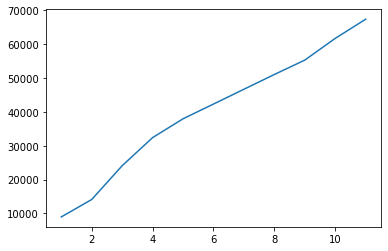

In [103]:
plt.plot(x, res)

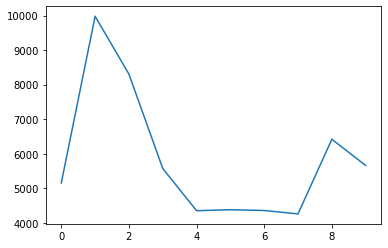

In [106]:
plt.plot(range(len(temp)), temp) # 可以看到前几天增加人数一直在变多，后面就增加数变得平稳

# 用户的出现频率

In [123]:
data1.head()

,imsi_,update_time_,lac_,cellid_,status_,ap_type_,device_id_,eventid_,Frequency
update_time_,,,,,,,,,
2019-05-08 20:09:29,460110413044304,2019-05-08 20:09:29,0,0,拒绝,FDD-LTE,DX-SZSC001,Normal Lau,1287
2019-05-08 20:09:41,460110413042577,2019-05-08 20:09:41,0,0,拒绝,FDD-LTE,DX-SZSC001,Normal Lau,7
2019-05-08 20:10:14,460110425023300,2019-05-08 20:10:14,0,0,拒绝,FDD-LTE,DX-SZSC001,Normal Lau,4
2019-05-08 20:10:40,460110714141865,2019-05-08 20:10:40,0,0,拒绝,FDD-LTE,DX-SZSC001,Normal Lau,2526
2019-05-08 20:08:55,460016692088409,2019-05-08 20:08:55,0,0,拒绝,FDD-LTE,LT-SZSC001,Normal Lau,14


In [126]:
data1['Frequency'] = data1.imsi_.map(data1.imsi_.value_counts())

In [127]:
data1.update_time_ = pd.to_datetime(data1.update_time_)

In [137]:
data1.update_time_.week

AttributeError: 'Series' object has no attribute 'week'

In [133]:
data2 = data1.copy()

In [134]:
data2.index = data1.update_time_

In [135]:
data2.index.week

<ipython-input-135-216dc2116ae2>:1: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  data2.index.week


Int64Index([19, 19, 19, 19, 19, 19, 19, 19, 19, 19,
            ...
            21, 21, 21, 21, 21, 21, 21, 21, 21, 21],
           dtype='int64', name='update_time_', length=338898)

In [138]:
data3 = data1[data1.Frequency > 2]

In [139]:
data3.index = data3.update_time_

In [140]:
data3.groupby(['imsi_',data3.index.week])['device_id_'].value_counts().unstack(fill_value=0)

<ipython-input-140-0a591cb1dd1f>:1: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  data3.groupby(['imsi_',data3.index.week])['device_id_'].value_counts().unstack(fill_value=0)


device_id_                    DX-SZSC001  LT-SZSC001  YD-SZSC001
imsi_           update_time_                                    
222992312514644 19                     0           7           0
                20                     0          17           0
                21                     0          10           0
228017227822524 20                     0           0           3
228017228577400 19                     0           3           0
...                                  ...         ...         ...
505025813590958 21                     9         287           0
525037903421171 19                     1           0           1
                20                     0           0           1
525058181486477 19                     0           1           2
525058231350753 19                     0           0           5

[35383 rows x 3 columns]

In [129]:
data1[data1.Frequency > 2].groupby(['imsi_',data1.update_time_.week])['device_id_'].value_counts().unstack(fill_value=0)

AttributeError: 'Series' object has no attribute 'week'

In [115]:
data1.groupby(['imsi_',data1.index.day])['device_id_'].value_counts().unstack(fill_value=0)

data1.groupby(['imsi_',data1.index.month])['device_id_'].value_counts().unstack(fill_value=0)

<ipython-input-115-d61b18b47ce4>:1: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  data1.groupby(['imsi_',data1.index.week])['device_id_'].value_counts().unstack(fill_value=0)


,device_id_,DX-SZSC001,LT-SZSC001,YD-SZSC001
imsi_,update_time_,,,
204043315383882,21,1,0,0
204043863737390,21,1,0,0
204046031010732,19,1,0,0
204047102616026,20,0,1,0
206012229081504,19,0,0,1
...,...,...,...,...
525058179845887,19,0,0,1
525058181486477,19,0,1,2
525058231216945,19,0,0,1


In [144]:
# 但是观察数据发现。datetime.week好像不是和我想的一样时间间隔为7天采样一次
# 尝试resample

data2.head(2)

,imsi_,update_time_,lac_,cellid_,status_,ap_type_,device_id_,eventid_,Frequency
update_time_,,,,,,,,,
2019-05-08 20:09:29,460110413044304,2019-05-08 20:09:29,0,0,拒绝,FDD-LTE,DX-SZSC001,Normal Lau,1287
2019-05-08 20:09:41,460110413042577,2019-05-08 20:09:41,0,0,拒绝,FDD-LTE,DX-SZSC001,Normal Lau,7


In [153]:
data2.resample('W')['imsi_', 'device_id_'].count()

,imsi_,device_id_
update_time_,,
2019-05-12,83342,83342
2019-05-19,142801,142801
2019-05-26,112755,112755


In [145]:
help(data2.resample)

Help on method resample in module pandas.core.generic:

resample(rule, axis=0, closed: Union[str, NoneType] = None, label: Union[str, NoneType] = None, convention: str = 'start', kind: Union[str, NoneType] = None, loffset=None, base: Union[int, NoneType] = None, on=None, level=None, origin: Union[str, ForwardRef('Timestamp'), datetime.datetime, numpy.datetime64, int, numpy.int64, float] = 'start_day', offset: Union[ForwardRef('Timedelta'), datetime.timedelta, numpy.timedelta64, int, numpy.int64, float, str, NoneType] = None) -> 'Resampler' method of pandas.core.frame.DataFrame instance
    Resample time-series data.
    
    Convenience method for frequency conversion and resampling of time
    series. Object must have a datetime-like index (`DatetimeIndex`,
    `PeriodIndex`, or `TimedeltaIndex`), or pass datetime-like values
    to the `on` or `level` keyword.
    
    Parameters
    ----------
    rule : DateOffset, Timedelta or str
        The offset string or object representing t

In [154]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338898 entries, 0 to 338897
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   imsi_         338898 non-null  int64         
 1   update_time_  338898 non-null  datetime64[ns]
 2   lac_          338898 non-null  int64         
 3   cellid_       338898 non-null  int64         
 4   status_       338898 non-null  object        
 5   ap_type_      338898 non-null  object        
 6   device_id_    338898 non-null  object        
 7   eventid_      338898 non-null  object        
 8   Frequency     338898 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 23.3+ MB


In [155]:
data1.head()

,imsi_,update_time_,lac_,cellid_,status_,ap_type_,device_id_,eventid_,Frequency
0,460110413044304,2019-05-08 20:09:29,0,0,拒绝,FDD-LTE,DX-SZSC001,Normal Lau,1287
1,460110413042577,2019-05-08 20:09:41,0,0,拒绝,FDD-LTE,DX-SZSC001,Normal Lau,7
2,460110425023300,2019-05-08 20:10:14,0,0,拒绝,FDD-LTE,DX-SZSC001,Normal Lau,4
3,460110714141865,2019-05-08 20:10:40,0,0,拒绝,FDD-LTE,DX-SZSC001,Normal Lau,2526
4,460016692088409,2019-05-08 20:08:55,0,0,拒绝,FDD-LTE,LT-SZSC001,Normal Lau,14


In [156]:
data1['day'] = data1.strftime('%A')

AttributeError: 'Series' object has no attribute 'strftime'

还可以设置每个日期是不是周末

In [160]:
data2['day'] = data2.index.strftime('%A')
data2.day.value_counts()

Thursday     66207
Friday       56036
Wednesday    53243
Saturday     43013
Monday       42093
Tuesday      39589
Sunday       38717
Name: day, dtype: int64

In [167]:
data2.head()

,imsi_,update_time_,lac_,cellid_,status_,ap_type_,device_id_,eventid_,Frequency,day
update_time_,,,,,,,,,,
2019-05-08 20:09:29,460110413044304,2019-05-08 20:09:29,0,0,拒绝,FDD-LTE,DX-SZSC001,Normal Lau,1287,Wednesday
2019-05-08 20:09:41,460110413042577,2019-05-08 20:09:41,0,0,拒绝,FDD-LTE,DX-SZSC001,Normal Lau,7,Wednesday
2019-05-08 20:10:14,460110425023300,2019-05-08 20:10:14,0,0,拒绝,FDD-LTE,DX-SZSC001,Normal Lau,4,Wednesday
2019-05-08 20:10:40,460110714141865,2019-05-08 20:10:40,0,0,拒绝,FDD-LTE,DX-SZSC001,Normal Lau,2526,Wednesday
2019-05-08 20:08:55,460016692088409,2019-05-08 20:08:55,0,0,拒绝,FDD-LTE,LT-SZSC001,Normal Lau,14,Wednesday


In [169]:
data3 = data2.drop('update_time_', axis=1)

pandas.core.series.Series

In [173]:
help(data3.asfreq)

Help on method asfreq in module pandas.core.generic:

asfreq(freq, method=None, how: Union[str, NoneType] = None, normalize: bool = False, fill_value=None) -> ~FrameOrSeries method of pandas.core.frame.DataFrame instance
    Convert TimeSeries to specified frequency.
    
    Optionally provide filling method to pad/backfill missing values.
    
    Returns the original data conformed to a new index with the specified
    frequency. ``resample`` is more appropriate if an operation, such as
    summarization, is necessary to represent the data at the new frequency.
    
    Parameters
    ----------
    freq : DateOffset or str
        Frequency DateOffset or string.
    method : {'backfill'/'bfill', 'pad'/'ffill'}, default None
        Method to use for filling holes in reindexed Series (note this
        does not fill NaNs that already were present):
    
        * 'pad' / 'ffill': propagate last valid observation forward to next
          valid
        * 'backfill' / 'bfill': use NEX

In [188]:
rng = pd.date_range(start='1/1/2017', end='1/31/2017', freq='H')
rng

DatetimeIndex(['2017-01-01 00:00:00', '2017-01-01 01:00:00',
               '2017-01-01 02:00:00', '2017-01-01 03:00:00',
               '2017-01-01 04:00:00', '2017-01-01 05:00:00',
               '2017-01-01 06:00:00', '2017-01-01 07:00:00',
               '2017-01-01 08:00:00', '2017-01-01 09:00:00',
               ...
               '2017-01-30 15:00:00', '2017-01-30 16:00:00',
               '2017-01-30 17:00:00', '2017-01-30 18:00:00',
               '2017-01-30 19:00:00', '2017-01-30 20:00:00',
               '2017-01-30 21:00:00', '2017-01-30 22:00:00',
               '2017-01-30 23:00:00', '2017-01-31 00:00:00'],
              dtype='datetime64[ns]', length=721, freq='H')

In [190]:
test = pd.DataFrame({'1':range(721)}, index=rng)

In [192]:
test.index.week

<ipython-input-192-b558acf56be9>:1: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  test.index.week


Int64Index([52, 52, 52, 52, 52, 52, 52, 52, 52, 52,
            ...
             5,  5,  5,  5,  5,  5,  5,  5,  5,  5],
           dtype='int64', length=721)

In [193]:
test['week'] = test.index.week

<ipython-input-193-b747304f213c>:1: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  test['week'] = test.index.week


In [197]:
test.loc[test.week == 1, :] # 可以看到week属性表示的是一年的第几周

,1,week
2017-01-02 00:00:00,24,1
2017-01-02 01:00:00,25,1
2017-01-02 02:00:00,26,1
2017-01-02 03:00:00,27,1
2017-01-02 04:00:00,28,1
...,...,...
2017-01-08 19:00:00,187,1
2017-01-08 20:00:00,188,1
2017-01-08 21:00:00,189,1
2017-01-08 22:00:00,190,1


In [198]:
data2.head()

,imsi_,update_time_,lac_,cellid_,status_,ap_type_,device_id_,eventid_,Frequency,day
update_time_,,,,,,,,,,
2019-05-08 20:09:29,460110413044304,2019-05-08 20:09:29,0,0,拒绝,FDD-LTE,DX-SZSC001,Normal Lau,1287,Wednesday
2019-05-08 20:09:41,460110413042577,2019-05-08 20:09:41,0,0,拒绝,FDD-LTE,DX-SZSC001,Normal Lau,7,Wednesday
2019-05-08 20:10:14,460110425023300,2019-05-08 20:10:14,0,0,拒绝,FDD-LTE,DX-SZSC001,Normal Lau,4,Wednesday
2019-05-08 20:10:40,460110714141865,2019-05-08 20:10:40,0,0,拒绝,FDD-LTE,DX-SZSC001,Normal Lau,2526,Wednesday
2019-05-08 20:08:55,460016692088409,2019-05-08 20:08:55,0,0,拒绝,FDD-LTE,LT-SZSC001,Normal Lau,14,Wednesday


In [200]:
data2.index.week

<ipython-input-200-216dc2116ae2>:1: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  data2.index.week


Int64Index([19, 19, 19, 19, 19, 19, 19, 19, 19, 19,
            ...
            21, 21, 21, 21, 21, 21, 21, 21, 21, 21],
           dtype='int64', name='update_time_', length=338898)

In [202]:
data2['week'] = data2.index.week

<ipython-input-202-ad2d676fec0f>:1: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  data2['week'] = data2.index.week


In [203]:
data2.head()

,imsi_,update_time_,lac_,cellid_,status_,ap_type_,device_id_,eventid_,Frequency,day,week
update_time_,,,,,,,,,,,
2019-05-08 20:09:29,460110413044304,2019-05-08 20:09:29,0,0,拒绝,FDD-LTE,DX-SZSC001,Normal Lau,1287,Wednesday,19
2019-05-08 20:09:41,460110413042577,2019-05-08 20:09:41,0,0,拒绝,FDD-LTE,DX-SZSC001,Normal Lau,7,Wednesday,19
2019-05-08 20:10:14,460110425023300,2019-05-08 20:10:14,0,0,拒绝,FDD-LTE,DX-SZSC001,Normal Lau,4,Wednesday,19
2019-05-08 20:10:40,460110714141865,2019-05-08 20:10:40,0,0,拒绝,FDD-LTE,DX-SZSC001,Normal Lau,2526,Wednesday,19
2019-05-08 20:08:55,460016692088409,2019-05-08 20:08:55,0,0,拒绝,FDD-LTE,LT-SZSC001,Normal Lau,14,Wednesday,19


In [206]:
data2.loc[data2.Frequency >= 2].groupby(['imsi_', 'week'])['device_id_'].value_counts().unstack(fill_value=0)

device_id_            DX-SZSC001  LT-SZSC001  YD-SZSC001
imsi_           week                                    
222992312514644 19             0           7           0
                20             0          17           0
                21             0          10           0
228017227822524 20             0           0           3
228017228577400 19             0           3           0
...                          ...         ...         ...
520030506571711 21             2           0           0
525037903421171 19             1           0           1
                20             0           0           1
525058181486477 19             0           1           2
525058231350753 19             0           0           5

[55381 rows x 3 columns]

In [207]:
data2

,imsi_,update_time_,lac_,cellid_,status_,ap_type_,device_id_,eventid_,Frequency,day,week
update_time_,,,,,,,,,,,
2019-05-08 20:09:29,460110413044304,2019-05-08 20:09:29,0,0,拒绝,FDD-LTE,DX-SZSC001,Normal Lau,1287,Wednesday,19
2019-05-08 20:09:41,460110413042577,2019-05-08 20:09:41,0,0,拒绝,FDD-LTE,DX-SZSC001,Normal Lau,7,Wednesday,19
2019-05-08 20:10:14,460110425023300,2019-05-08 20:10:14,0,0,拒绝,FDD-LTE,DX-SZSC001,Normal Lau,4,Wednesday,19
2019-05-08 20:10:40,460110714141865,2019-05-08 20:10:40,0,0,拒绝,FDD-LTE,DX-SZSC001,Normal Lau,2526,Wednesday,19
2019-05-08 20:08:55,460016692088409,2019-05-08 20:08:55,0,0,拒绝,FDD-LTE,LT-SZSC001,Normal Lau,14,Wednesday,19
...,...,...,...,...,...,...,...,...,...,...,...
2019-05-24 22:38:32,460110418450384,2019-05-24 22:38:32,0,0,拒绝,FDD-LTE,DX-SZSC001,Normal Lau,2,Friday,21
2019-05-24 22:38:34,460010035785382,2019-05-24 22:38:34,0,0,拒绝,FDD-LTE,LT-SZSC001,Normal Lau,1,Friday,21
2019-05-24 22:38:36,460078153594140,2019-05-24 22:38:36,0,0,拒绝,TDD-LTE,YD-SZSC001,Normal Lau,133,Friday,21


In [208]:
data2.imsi_['2019-5-8-20':'2019-5-8-22']

update_time_
2019-05-08 20:09:29    460110413044304
2019-05-08 20:09:41    460110413042577
2019-05-08 20:10:14    460110425023300
2019-05-08 20:10:40    460110714141865
2019-05-08 20:08:55    460016692088409
                            ...       
2019-05-08 22:59:10    460029988447986
2019-05-08 22:59:12    460004183882738
2019-05-08 22:59:15    460071490036208
2019-05-08 22:59:28    460110725947927
2019-05-08 22:59:34    460016497525494
Name: imsi_, Length: 2283, dtype: int64

In [209]:
from datetime import time

In [210]:
time(10,0)

datetime.time(10, 0)

In [216]:
data2.imsi_.loc[time(22,0):time(23,0)]

update_time_
2019-05-08 22:00:07    460061061015346
2019-05-08 22:00:07    460014568505832
2019-05-08 22:00:11    460015232357591
2019-05-08 22:00:12    460013001965412
2019-05-08 22:00:26    460016717622502
                            ...       
2019-05-24 22:38:32    460110418450384
2019-05-24 22:38:34    460010035785382
2019-05-24 22:38:36    460078153594140
2019-05-24 22:39:00    460001921935238
2019-05-24 22:39:04    460015306678853
Name: imsi_, Length: 10992, dtype: int64

In [222]:
data2.index.hour.min()

0

In [225]:
data2.index.hour.max()

23

In [218]:
data2.index.max()

Timestamp('2019-05-24 22:39:04')

# 指定时间进入某地的人群挖掘

In [243]:
# res = []
# for time in range()
d = {}
res1 = data2.loc[time(8,0):time(10,0)]
for i, j in res1.groupby(res1.index.day)['imsi_']:
    d[i] = set(j.to_list())

In [248]:
res = None
for each in d.values():
    if not res:
        res = each
    else:
        res &= each
res

{460000211720632,
 460002406691111,
 460004202121725,
 460014926623352,
 460029571752973,
 460110267853698,
 460110412995758}

In [238]:
res1.index.day.value_counts()

22    3808
23    3569
11    2964
13    2884
16    2848
15    2743
14    2684
17    2677
20    2581
21    2546
24    2534
10    2522
9     2477
12    2391
19    2097
18    2092
Name: update_time_, dtype: int64